# Heart Disease Prediction using Logistic Regression

In [ ]:
import pandas as pd
import numpy as np

In [39]:
data=pd.read_csv(r"C:\Users\bannu\Desktop\cards\Tefologic Training\heart_2020_cleaned.csv")

In [40]:
data.head(10)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
5,Yes,28.87,Yes,No,No,6.0,0.0,Yes,Female,75-79,Black,No,No,Fair,12.0,No,No,No
6,No,21.63,No,No,No,15.0,0.0,No,Female,70-74,White,No,Yes,Fair,4.0,Yes,No,Yes
7,No,31.64,Yes,No,No,5.0,0.0,Yes,Female,80 or older,White,Yes,No,Good,9.0,Yes,No,No
8,No,26.45,No,No,No,0.0,0.0,No,Female,80 or older,White,"No, borderline diabetes",No,Fair,5.0,No,Yes,No
9,No,40.69,No,No,No,0.0,0.0,Yes,Male,65-69,White,No,Yes,Good,10.0,No,No,No


In [41]:
data.shape

(319795, 18)

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [43]:
data.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [74]:
data.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

# Data Preprocessing

In [45]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [46]:
for obj in data:
    data[obj]=le.fit_transform(data[obj].astype(str))
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,223,1,0,0,23,24,0,0,7,5,2,1,4,19,1,0,1
1,0,524,0,0,1,0,0,0,0,12,5,0,1,4,21,0,0,0
2,0,1103,1,0,0,13,24,0,1,9,5,2,1,1,22,1,0,0
3,0,883,0,0,0,0,0,0,0,11,5,0,0,2,20,0,0,1
4,0,837,0,0,0,21,0,1,0,4,5,0,1,4,22,0,0,0


In [47]:
data.shape

(319795, 18)

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype
---  ------            --------------   -----
 0   HeartDisease      319795 non-null  int32
 1   BMI               319795 non-null  int32
 2   Smoking           319795 non-null  int32
 3   AlcoholDrinking   319795 non-null  int32
 4   Stroke            319795 non-null  int32
 5   PhysicalHealth    319795 non-null  int32
 6   MentalHealth      319795 non-null  int32
 7   DiffWalking       319795 non-null  int32
 8   Sex               319795 non-null  int32
 9   AgeCategory       319795 non-null  int32
 10  Race              319795 non-null  int32
 11  Diabetic          319795 non-null  int32
 12  PhysicalActivity  319795 non-null  int32
 13  GenHealth         319795 non-null  int32
 14  SleepTime         319795 non-null  int32
 15  Asthma            319795 non-null  int32
 16  KidneyDisease     319795 non-null  int32
 17  SkinCancer

# Data Visualization

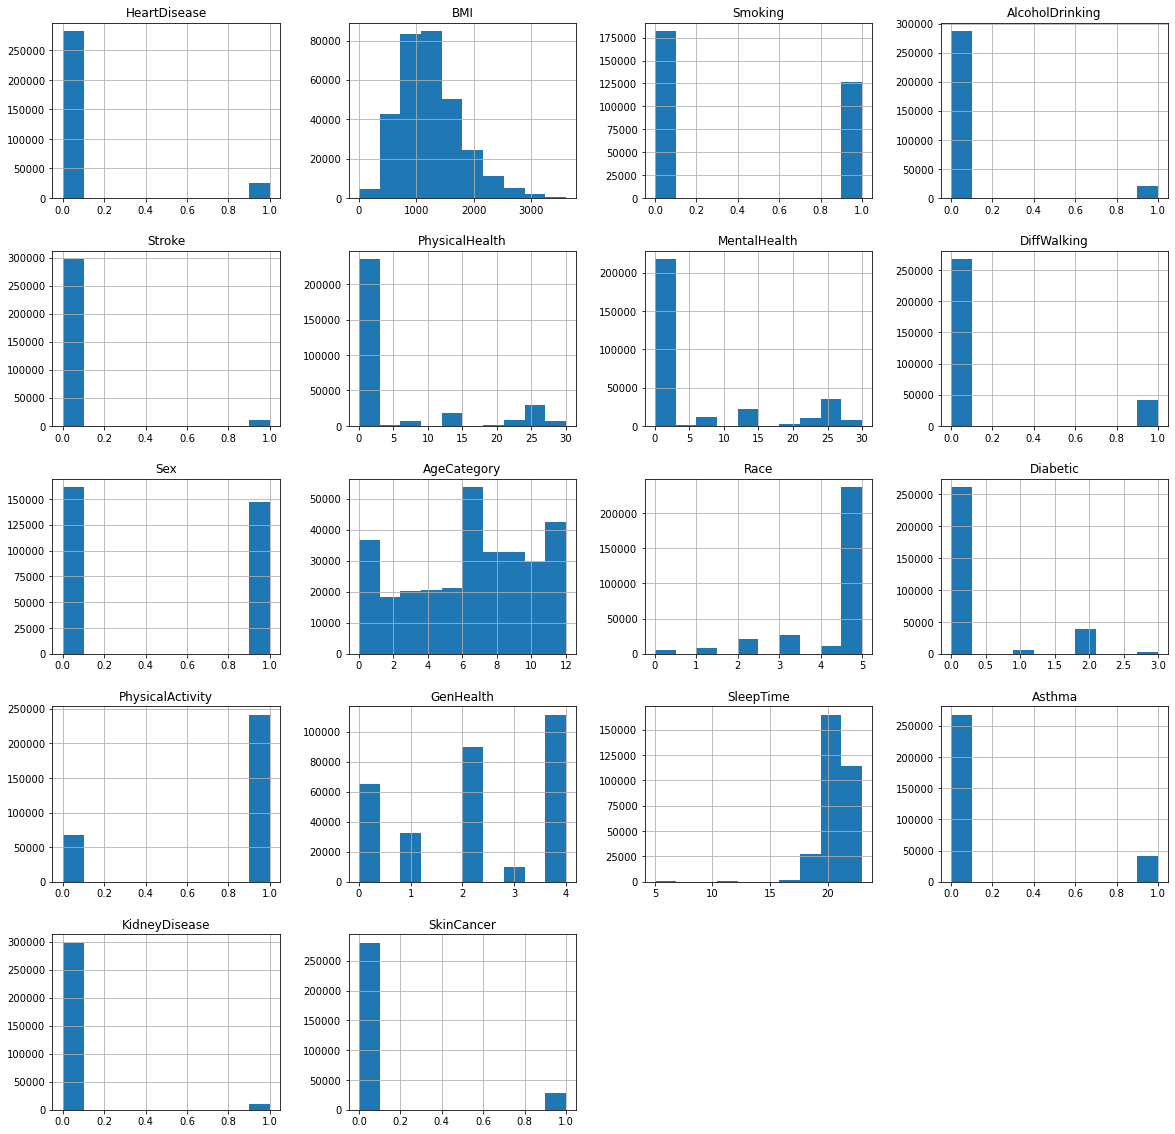

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt
data.hist(figsize=(20,20))
plt.savefig('featuresplot')

In [50]:
data = data.drop(data[data['SleepTime']<5].index,axis=0)

In [51]:
data.shape

(308731, 18)

In [88]:
x=data.drop(['HeartDisease','Race','DiffWalking','GenHealth','SkinCancer'],axis=1)

In [89]:
x.head()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,Sex,AgeCategory,Diabetic,PhysicalActivity,SleepTime,Asthma,KidneyDisease
0,223,1,0,0,23,24,0,7,2,1,19,1,0
1,524,0,0,1,0,0,0,12,0,1,21,0,0
2,1103,1,0,0,13,24,1,9,2,1,22,1,0
3,883,0,0,0,0,0,0,11,0,0,20,0,0
4,837,0,0,0,21,0,0,4,0,1,22,0,0


In [90]:
y=data['HeartDisease']

In [91]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: HeartDisease, dtype: int32

# Model Building using Logistic Regression

In [92]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=45)

In [93]:
x_train.shape

(206849, 13)

In [94]:
x_test.shape

(101882, 13)

In [95]:
y_train.shape

(206849,)

In [96]:
y_test.shape

(101882,)

In [97]:
from sklearn.linear_model import LogisticRegression
r=LogisticRegression()
r.fit(x_train,y_train)

C:\Users\bannu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [98]:
y_pred=r.predict(x_test)

In [99]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [101]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9164327359101706

In [76]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_pred,y_test)

0.08360652519581477

In [116]:
results=pd.DataFrame(columns=['actual','predicted'])
results['actual']=y_test
results['predicted']=y_pred
results=results.reset_index()
results['id']=results.index
results.head()

,index,actual,predicted,id
0,187276,0,0,0
1,61814,0,0,1
2,18673,0,0,2
3,229503,0,0,3
4,114365,0,0,4


# correlation matrics

<AxesSubplot:>

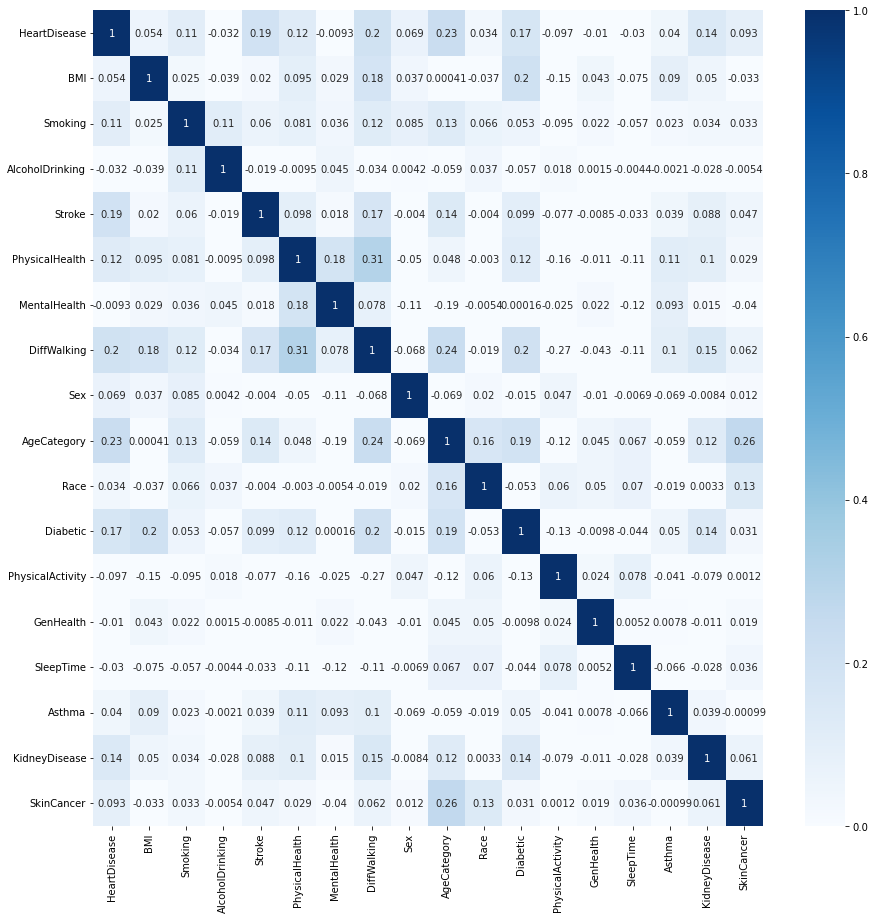

In [115]:
import seaborn as sns
plt.subplots(figsize=(15,15))
sns.heatmap(data.corr(),annot=True,vmax=1,vmin=0,cmap='Blues')

In [75]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[92866,   650],
       [ 7868,   498]], dtype=int64)

# Predicting New Values

In [85]:
new=[[223,0,1,0,1,1,1,0,0,0,0,1,1,1,1,1]]
real=r.predict(new)
real

C:\Users\bannu\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])